<a href="https://colab.research.google.com/github/tushar-lawande/Data-Science-Project-Code-Soft/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

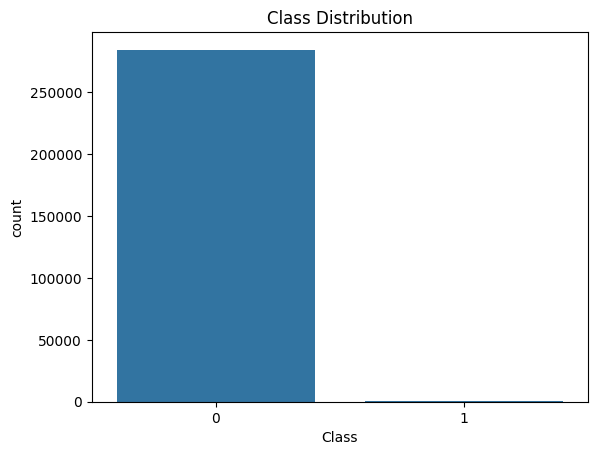

0
Logistic Regression Performance:
Precision: 0.9748975027953783
Recall: 0.9181585228868295
F1 Score: 0.9456777179218336
Accuracy: 0.9471536851731355
Confusion Matrix:
 [[55403  1347]
 [ 4663 52313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Random Forest Classifier Performance:
Precision: 0.9998596097150078
Recall: 1.0
F1 Score: 0.9999297999298
Accuracy: 0.9999296554877513
Confusion Matrix:
 [[56742     8]
 [    0 56976]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.0

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Data Preprocessing
# Handling missing values (if any)
data.isnull().sum()

# Remove rows with missing target values
data = data.dropna(subset=['Class'])

# Check again for any missing values in the target variable
print(data['Class'].isnull().sum())

# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Class', axis=1))

# Handling Class Imbalance using SMOTE with reduced number of neighbors
X = data_scaled
y = data['Class']
smote = SMOTE(sampling_strategy='minority', k_neighbors=2)  # Adjust k_neighbors as needed
X_res, y_res = smote.fit_resample(X, y)

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Model Training
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("Logistic Regression Performance:")
evaluate_model(log_reg, X_test, y_test)

print("Random Forest Classifier Performance:")
evaluate_model(rf_clf, X_test, y_test)

# Hyperparameter Tuning using RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=4, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
best_rf_clf = random_search.best_estimator_

print("Best Random Forest Performance after Hyperparameter Tuning:")
evaluate_model(best_rf_clf, X_test, y_test)
